<a href="https://colab.research.google.com/github/shashwat-2077/ComputerVisionWeek_AI/blob/main/WeekShapeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2    #for doing variuos operations on the images
from matplotlib import pyplot as plt    #for plotting the images in the notebook  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imgBGR = cv2.imread("/content/drive/MyDrive/Code/CV Week/2/Screenshot 2021-06-23 202708.png")

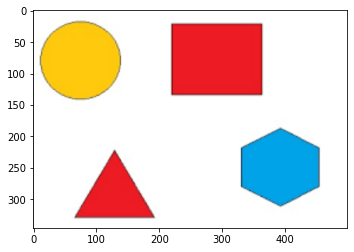

In [ ]:
plt.imshow(imgBGR)

In [ ]:
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

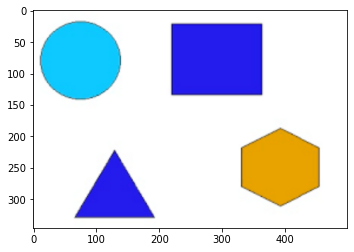

In [ ]:
plt.imshow(img)

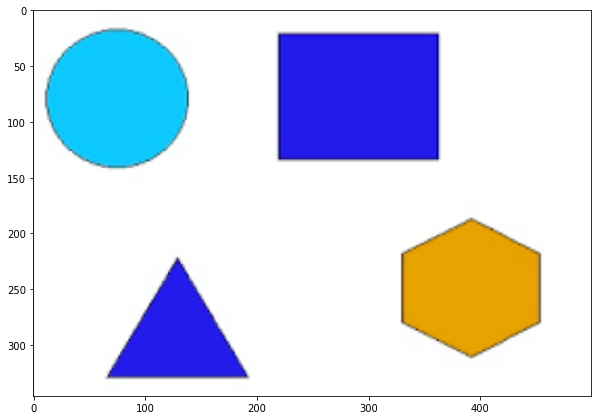

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

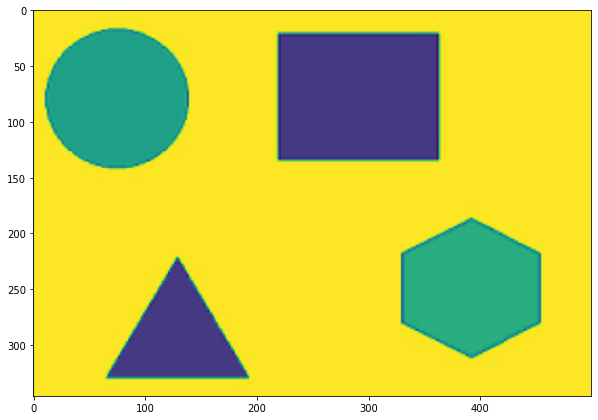

In [ ]:
# converting image into grayscale image
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.imshow(img_gray)
plt.show()

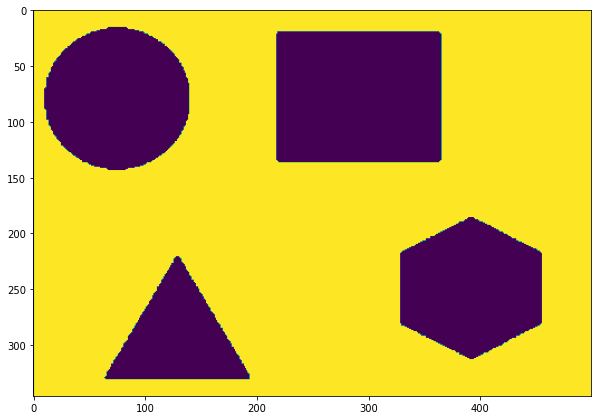

In [ ]:
# thresholding to get binary image
_, thresh = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.imshow(thresh)
plt.show()

In [ ]:
# find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
i=0

for contour in contours:
    
    # ignoring first counter as findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
    
    # cv2.approxPloyDP() function approximates the shape
    sides = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    
    #draw contours based on the shape
    cv2.drawContours(img, [sides], 0, (0, 0, 0), 2)
    
    
    #print the type of shape in the middle of shape(- number helps in alinging the text)
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])-30
        y = int(M['m01']/M['m00'])
    
    #based on length of approx(polygonal curves), detect shape
    if len(sides) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 0),1)
        
    elif len(sides) == 4:
        x1 ,y1, w, h = cv2.boundingRect(sides)
        aspectRatio = float(w)/h
        
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
          cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 0),1)
        else:
          cv2.putText(img, "Quadrilateral", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 0),1)
        
    elif len(sides) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 0),1)
        
    elif len(sides) == 6:
        cv2.putText(img, "Hexagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 0),1)
            
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 0),1)

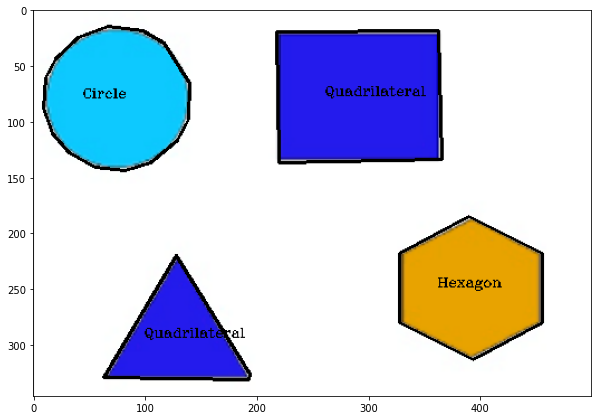

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

#the below code will work in juputer notebook and not in google colab as it will open a separate window to display the resultant image
#cv2.imshow('shapes', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()